**Algoritmos de Clasificación 5 - Mejorando KNN - LoL e-sports**

#K-Nearest-Neighbors

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #la libreria para separar en train y test
from sklearn.neighbors import KNeighborsClassifier #knn

In [278]:
url_teams = 'https://raw.githubusercontent.com/cporras/lol-esports/main/Data/df_teams.csv'
df = pd.read_csv(url_teams)

In [279]:
#Usamos las estadisticas obtenidas al minuto 15 de una partida,
#de esta manera entrenaremos un modelo con el objetivo de predecir el resultado de un juego al minuto 15

#Los datos que entran son resultado, primer asesinato, primer dragon, primer heraldo, primera torre, y oro, experiencia, cs y asesinatos al minuto 15
features = ['result','firstblood','firstdragon','firstherald','firsttower','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15']
df_feat =  df[features]
df_feat.head()

,result,firstblood,firstdragon,firstherald,firsttower,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
0,0,1.0,1.0,1.0,1.0,24815.0,31121.0,608.0,951.0,-107.0,18.0,1.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,23864.0,31228.0,590.0,-951.0,107.0,-18.0,0.0,0.0,1.0
2,0,0.0,0.0,1.0,1.0,27355.0,32158.0,560.0,2145.0,-420.0,44.0,5.0,6.0,6.0
3,1,1.0,1.0,0.0,0.0,25210.0,32578.0,516.0,-2145.0,420.0,-44.0,6.0,9.0,5.0
4,0,1.0,1.0,1.0,0.0,24131.0,29284.0,527.0,-457.0,-1218.0,-16.0,2.0,3.0,3.0


In [280]:
df_feat.shape

(682, 14)

In [281]:
df_feat.dtypes

result            int64
firstblood      float64
firstdragon     float64
firstherald     float64
firsttower      float64
goldat15        float64
xpat15          float64
csat15          float64
golddiffat15    float64
xpdiffat15      float64
csdiffat15      float64
killsat15       float64
assistsat15     float64
deathsat15      float64
dtype: object

In [282]:
df_feat.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
#Separamos los datos de entrada de la salida
X = df_feat.drop('result', axis=1) #Elimino de mi dataset la variable a predecir
y = df_feat.result #Defino el Target

In [284]:
#Separación del dataset, 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [285]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [286]:
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

In [287]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8375527426160337
% de aciertos sobre el set de evaluación: 0.7843137254901961


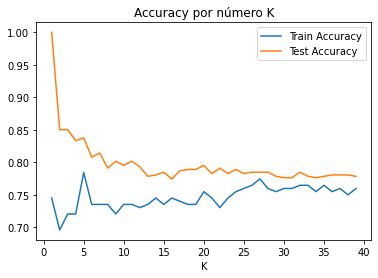

In [288]:
rows = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_train_pred = knn.predict(X_train)
  y_test_pred = knn.predict(X_test)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  rows.append([i, test_accuracy,train_accuracy])
acc = pd.DataFrame(rows, columns=['K', 'Train Accuracy','Test Accuracy'])
acc.plot(kind='line', x='K', y =['Train Accuracy','Test Accuracy'])
plt.title('Accuracy por número K')
plt.show()

In [289]:
#Se decide trabajar con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Evaluación del modelo

In [303]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7843137254901961


[[79 23]
 [21 81]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


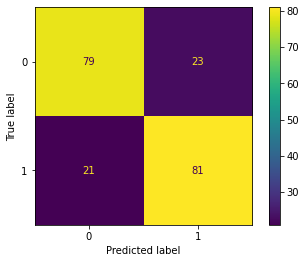

In [304]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(knn, X_test, y_test)
plt.show()



In [305]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [306]:
cm = confusion_matrix(y_test, y_test_pred)
precision = cm[1][1] / (cm[1][1]+cm[1][0])
recall  = cm[1][1] / (cm[1][1]+cm[0][1])
accuracy  = (cm[1][1]+cm[0][0]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
especifity  = cm[0][0] / (cm[0][0]+cm[0][1])
print('precision:   % ',precision)
print('recall:      % ',recall)
print('accuracy:    % ',accuracy)
print('especifity:  % ',especifity)

precision:   %  0.7941176470588235
recall:      %  0.7788461538461539
accuracy:    %  0.7843137254901961
especifity:  %  0.7745098039215687


In [307]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print("F1 Score:    % ", f1_score(y_test, y_test_pred))

F1 Score:    %  0.7864077669902914


#Curva ROC

AUC for our classifier is: 0.8226643598615917


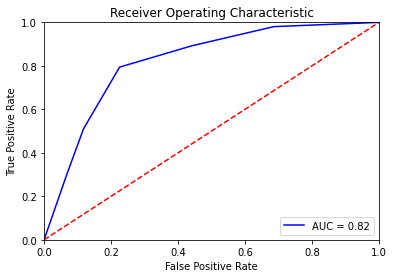

In [309]:
from sklearn.metrics import roc_curve, auc

class_probabilities = knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Leave One Out Cross-Validation - LOOCV

In [91]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [92]:
# Separacion en X e y
X = df_feat.drop('result', axis=1) #Elimino de mi dataset la variable a predecir
y = df_feat.result #Defino el Target

print(X.shape, y.shape)

(678, 13) (678,)


In [93]:
pd.Series(y).value_counts()

1    339
0    339
Name: result, dtype: int64

In [94]:
#Creamos el modelo 
model = KNeighborsClassifier(n_neighbors=5)

#Creamos el objeto de cross val
cv = LeaveOneOut()

In [95]:
# Evaluacion del Modelo
%%time
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

CPU times: user 1.02 s, sys: 45.7 ms, total: 1.06 s
Wall time: 5.45 s


In [96]:
scores

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [97]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.755 (0.430)


#K- FOLD CROSS VALIDATION

In [98]:
kf = KFold(n_splits=10)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

In [99]:
scores

array([0.69117647, 0.75      , 0.77941176, 0.72058824, 0.77941176,
       0.75      , 0.63235294, 0.79411765, 0.79104478, 0.68656716])

In [100]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.737 (0.051)


#StratifiedKFold

In [102]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [103]:
%%time
scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf, n_jobs=-1)

CPU times: user 42.1 ms, sys: 3.03 ms, total: 45.1 ms
Wall time: 106 ms


In [104]:
scores

array([0.76470588, 0.72058824, 0.73529412, 0.77941176, 0.75      ,
       0.75      , 0.73529412, 0.72058824, 0.80597015, 0.79104478])

In [105]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.755 (0.028)


#GridSearchCV

In [106]:
#Importamos librerias y el Dataset
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [219]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [209]:
#Definicion de Hyperparámetros
param_grid = {'n_neighbors':np.arange(5, 15),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,2,3,5,10,15,20,25,30],
              'algorithm':['auto', 'ball_tree','kd_tree', 'brute']}

#Utilizamos la grilla definida anteriormente...
modelGridSearch = GridSearchCV(knn, param_grid=param_grid, cv=5,scoring='roc_auc',verbose=20)

In [ ]:
modelGridSearch.fit(X_train, y_train)

In [213]:
print("Mejores parametros: "+str(modelGridSearch.best_params_))
print("Mejor Score: "+str(modelGridSearch.best_score_))

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 13, 'weights': 'uniform'}
Mejor Score: 0.8454777802927417


In [214]:
prediction = modelGridSearch.predict(X_test)
prediction_proba = modelGridSearch.predict_proba(X_test)[:,1]

In [215]:
print('Accuracy:', accuracy_score(y_test, prediction))
from sklearn.metrics import roc_auc_score
print('auc:',roc_auc_score(y_test,prediction_proba))

Accuracy: 0.7352941176470589
auc: 0.8256439830834295


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


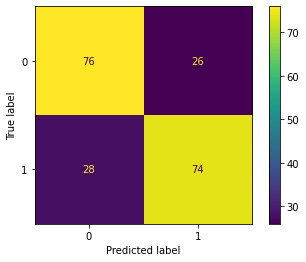

In [216]:
plot_confusion_matrix(modelGridSearch, X_test, y_test)
plt.show()

AUC for our classifier is: 0.8256439830834295


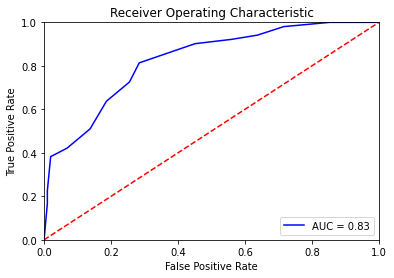

In [300]:
fpr, tpr, threshold = roc_curve(y_test, prediction_proba)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#RandomizedSearchCV

In [221]:
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

In [222]:
param_dist = {'n_neighbors':sp.stats.randint(1, 15),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 40),
              'algorithm':['auto', 'ball_tree','kd_tree', 'brute']}

modelRandom = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0, cv=5,scoring='roc_auc',verbose=20)

In [ ]:
modelRandom.fit(X_train, y_train)

In [224]:
print("Mejores parametros: "+str(modelRandom.best_params_))
print("Mejor Score: "+str(modelRandom.best_score_))

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 13, 'weights': 'uniform'}
Mejor Score: 0.8454777802927417


In [225]:
predictionRandom = modelRandom.predict(X_test)
predictionRandom_proba = modelRandom.predict_proba(X_test)[:,1]
print('Accuracy:', accuracy_score(y_test, predictionRandom))
print('auc:',roc_auc_score(y_test,predictionRandom_proba))

Accuracy: 0.7352941176470589
auc: 0.8256439830834295


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


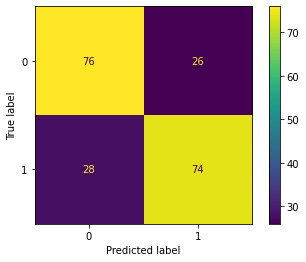

In [226]:
plot_confusion_matrix(modelRandom, X_test, y_test)
plt.show()

AUC for our classifier is: 0.8256439830834295


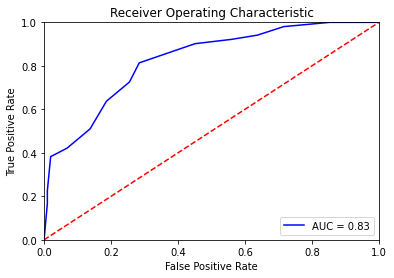

In [299]:
fpr, tpr, threshold = roc_curve(y_test, predictionRandom_proba)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#DataSet con datos de más de 1 liga

In [241]:
url = 'https://raw.githubusercontent.com/cporras/lol-esports/main/Data/2021_LoL_esports_match_data_from_OraclesElixir_20211020.csv'
df = pd.read_csv(url)
df = df[df['league'].isin(['LCK','LPL','LCS','LEC'])]
df = df[df['datacompleteness']=='complete']
df = df[df['position']=='team']
df = df.drop(['datacompleteness','url','league','year','patch','ban1','ban2','ban3','ban4','ban5','elementaldrakes','opp_elementaldrakes','infernals','mountains','clouds','oceans','dragons (type unknown)','elders','opp_elders','damageshare','visionscore','vspm','earnedgoldshare','gspd'],axis=1)
df['gameid'] = df['gameid'] + '-' + df['game'].astype(str)
df.dropna(subset=['gameid'],inplace=True)
df = df.reset_index().drop('index',axis=1)

In [244]:
features = ['result','firstblood','firstdragon','firstherald','firsttower','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15']
df_leagues =  df[features]
df_leagues.shape

(1976, 14)

In [ ]:
df_leagues.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [246]:
X_leagues = df_leagues.drop('result', axis=1)
y_leagues = df_leagues.result

X_leagues_train, X_leagues_test, y_leagues_train, y_leagues_test = train_test_split(X_leagues, y_leagues, test_size=0.30, random_state=42) 

In [272]:
knn = KNeighborsClassifier()
param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 40),
              'algorithm':['auto', 'ball_tree','kd_tree', 'brute']}

modelRandomLeagues = RandomizedSearchCV(knn, param_dist,n_iter=1000, random_state=0, cv=5,scoring='roc_auc',verbose=20)

In [273]:
modelRandomLeagues.fit(X_leagues_train, y_leagues_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
[CV 1/5; 501/1000] START algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance
[CV 1/5; 501/1000] END algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance;, score=0.797 total time=   0.0s
[CV 2/5; 501/1000] START algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance
[CV 2/5; 501/1000] END algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance;, score=0.827 total time=   0.0s
[CV 3/5; 501/1000] START algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance
[CV 3/5; 501/1000] END algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance;, score=0.793 total time=   0.0s
[CV 4/5; 501/1000] START algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance
[CV 4/5; 501/1000] END algorithm=ball_tree, leaf_size=8, n_neighbors=18, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5; 501/1000] START algorithm=ball_tree, leaf_size=8, n_neighbors=18, weig

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=1000,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbaea18c5d0>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbae9d66d10>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0, scoring='roc_auc', verbose=20)

In [274]:
print("Mejores parametros: "+str(modelRandomLeagues.best_params_))
print("Mejor Score: "+str(modelRandomLeagues.best_score_))
predictionRandomLeagues = modelRandomLeagues.predict(X_leagues_test)
predictionRandomLeagues_proba = modelRandomLeagues.predict_proba(X_leagues_test)[:,1]
print('Accuracy:', accuracy_score(y_leagues_test, predictionRandomLeagues))
print('auc:',roc_auc_score(y_leagues_test,predictionRandomLeagues_proba))

Mejores parametros: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 19, 'weights': 'uniform'}
Mejor Score: 0.8076680672268907
Accuracy: 0.7179054054054054
auc: 0.7986711001416884


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


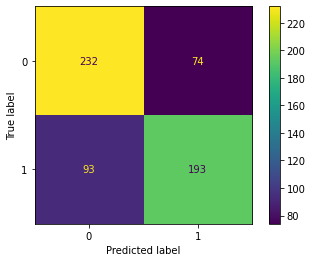

In [275]:
plot_confusion_matrix(modelRandomLeagues, X_leagues_test, y_leagues_test)
plt.show()

AUC for our classifier is: 0.7986711001416884


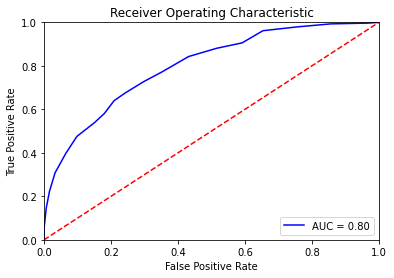

In [298]:
fpr, tpr, threshold = roc_curve(y_leagues_test, predictionRandomLeagues_proba)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()